**Import Libraries**

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Get data and check it**

In [174]:
df = pd.read_csv("/content/sample_data/Social_Network_Ads.csv")
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
223,15593715,Male,60,102000,1
191,15662067,Female,19,26000,0
348,15579212,Male,39,77000,0
82,15709476,Male,20,49000,0
384,15806901,Female,57,33000,1


**Select important features for this topic**

In [175]:
df = df.iloc[:,2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
49,31,89000,0
47,27,54000,0
168,29,148000,1
300,58,38000,1
358,40,71000,1


**Devide Data into X and y**

In [176]:
X = df.drop("Purchased",axis=1)
y= df["Purchased"]

**Train Test Split**

In [177]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)
X_train.shape,X_test.shape

((280, 2), (120, 2))

**Feature Scaling (StandardScaler)**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fit the training data, Only training data never fit the test data. train data will learn the parameters
scaler.fit(X_train)

#Transform the train and test data
X_train_scaled= scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#check the scaled values
X_train_scaled

**Convert scaled values from np.array  back to DataFrame** 

In [179]:
X_train_scaled = pd.DataFrame(data = X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(data = X_test_scaled, columns = X_test.columns)

#check the DataFrames
X_train_scaled,X_test_scaled

(          Age  EstimatedSalary
 0   -1.163172        -1.584970
 1    2.170181         0.930987
 2    0.013305         1.220177
 3    0.209385         1.075582
 4    0.405465        -0.486047
 ..        ...              ...
 275  0.993704        -1.151185
 276 -0.869053        -0.775237
 277 -0.182774        -0.514966
 278 -1.065133        -0.457127
 279 -1.163172         1.393691
 
 [280 rows x 2 columns],           Age  EstimatedSalary
 0   -0.771013         0.497201
 1    0.013305        -0.572804
 2   -0.280814         0.150172
 3   -0.771013         0.265849
 4   -0.280814        -0.572804
 ..        ...              ...
 115  1.091743        -0.139018
 116  0.699584         1.769639
 117 -0.672973         0.555039
 118  0.797624         0.352606
 119  0.895664        -0.543885
 
 [120 rows x 2 columns])

**Compare mean and std of before scaled data and after scaled data**

In [180]:
np.round(X_train.describe(),2)

,Age,EstimatedSalary
count,280.00,280.00
mean,37.86,69807.14
std,10.22,34641.20
min,18.00,15000.00
25%,30.00,43000.00
50%,37.00,70500.00
75%,46.00,88000.00
max,60.00,150000.00


In [181]:
np.round(X_train_scaled.describe(),2)
#Here we can see that we have scaled the values and the mean is now 0 and std is 1.

,Age,EstimatedSalary
count,280.00,280.00
mean,0.00,0.00
std,1.00,1.00
min,-1.95,-1.58
25%,-0.77,-0.78
50%,-0.08,0.02
75%,0.80,0.53
max,2.17,2.32


**Effect of Scaling on Plot**

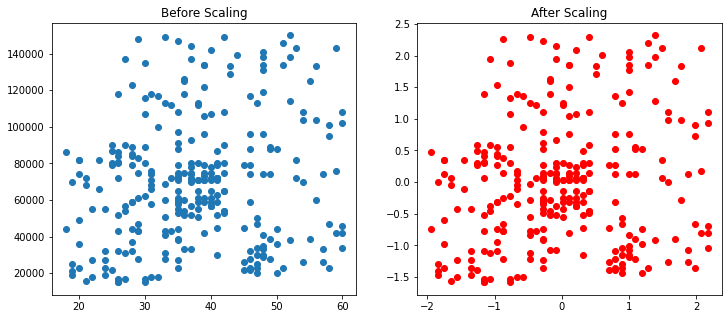

In [182]:
fig,(ax1,ax2) =plt.subplots(ncols = 2,figsize=(12,5))

ax1.scatter(X_train["Age"],X_train["EstimatedSalary"])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"],color= "red")
ax2.set_title("After Scaling")

plt.show()

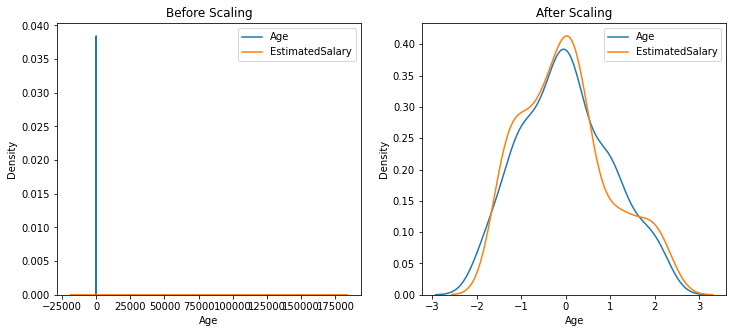

In [183]:
fig,(ax1,ax2) =plt.subplots(ncols = 2,figsize=(12,5))

#Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Age"],ax=ax1)
sns.kdeplot(X_train["EstimatedSalary"],ax=ax1)
ax1.legend(["Age","EstimatedSalary"])

#After Scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled["Age"],ax=ax2)
sns.kdeplot(X_train_scaled["EstimatedSalary"],ax=ax2)
ax2.legend(["Age","EstimatedSalary"])
plt.show()

**Individual Distribution of features**

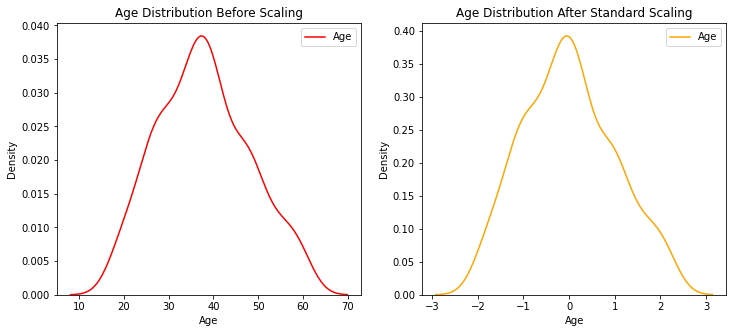

In [184]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))

#Before Scaling
ax1.set_title("Age Distribution Before Scaling")
sns.kdeplot(X_train["Age"],ax=ax1,color="red")
ax1.legend(["Age"])

#After Scaling
ax2.set_title("Age Distribution After Standard Scaling")
sns.kdeplot(X_train_scaled["Age"],ax=ax2,color="orange")
ax2.legend(["Age"])

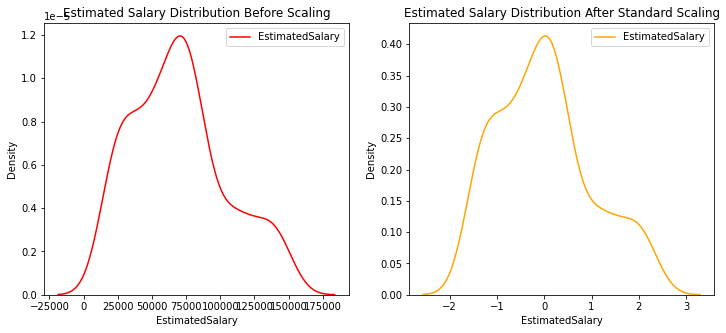

In [186]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))

#Before Scaling
ax1.set_title("Estimated Salary Distribution Before Scaling")
sns.kdeplot(X_train["EstimatedSalary"],ax=ax1,color="red")
ax1.legend(["EstimatedSalary"])

#After Scaling
ax2.set_title("Estimated Salary Distribution After Standard Scaling")
sns.kdeplot(X_train_scaled["EstimatedSalary"],ax=ax2,color="orange")
ax2.legend(["EstimatedSalary"])

**Why Scaling is Important, With Example.**



In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

Accuracy = accuracy_score(y_test,y_pred)
Accuracy_scaled = accuracy_score(y_test,y_pred_scaled)

print(f"Actual Accuracy Score {Accuracy*100}.")
print(f"Scaled Accuracy Score {Accuracy_scaled*100}.")



Actual Accuracy Score 65.83333333333333.
Scaled Accuracy Score 86.66666666666667.


**Where Scaling is not required..**

In [188]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

Accuracy = accuracy_score(y_test,y_pred)
Accuracy_scaled = accuracy_score(y_test,y_pred_scaled)

print(f"Actual Accuracy Score {Accuracy*100}.")
print(f"Scaled Accuracy Score {Accuracy_scaled*100}.")

#Here we saw there was not much diffrance in both Actual as well as Scaled values.

Actual Accuracy Score 86.66666666666667.
Scaled Accuracy Score 87.5.


**Effects of Outliers**

Manually Adding Few Outliers

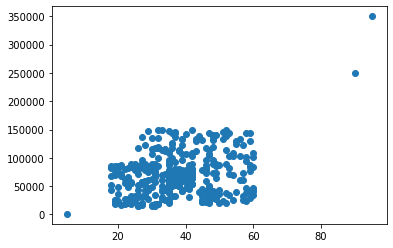

In [189]:
df = df.append(pd.DataFrame({"Age":[5,90,95],"EstimatedSalary":[1000,250000,350000],"Purchased":[0,1,1]}),ignore_index=True)
plt.scatter(df["Age"],df["EstimatedSalary"])

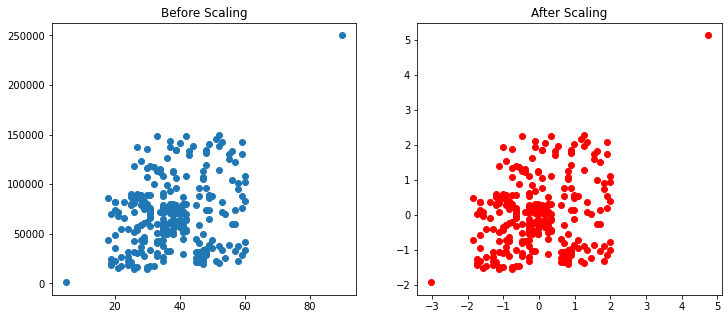

In [190]:
X = df.drop("Purchased",axis=1)
y= df["Purchased"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)
X_train.shape,X_test.shape

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#fit the training data, Only training data never fit the test data. train data will learn the parameters
scaler.fit(X_train)
#Transform the train and test data
X_train_scaled= scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#check the scaled values
X_train_scaled

X_train_scaled = pd.DataFrame(data = X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(data = X_test_scaled, columns = X_test.columns)

#check the DataFrames
X_train_scaled,X_test_scaled

np.round(X_train.describe(),2)

np.round(X_train_scaled.describe(),2)
#Here we can see that we have scaled the values and the mean is now 0 and std is 1.

fig,(ax1,ax2) =plt.subplots(ncols = 2,figsize=(12,5))

ax1.scatter(X_train["Age"],X_train["EstimatedSalary"])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"],color= "red")
ax2.set_title("After Scaling")

plt.show()

#Here we can see no impact on outliers we will have to deal with them saperately.